In [26]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline 

In [27]:
data = pd.read_excel('data/Legatum_Prosperity_Index_Full_2020_Data_Set.xlsx', engine='openpyxl')
data.head()

,area_name,area_code,area_group,rank_2007,rank_2008,rank_2009,rank_2010,rank_2011,rank_2012,rank_2013,...,score_2011,score_2012,score_2013,score_2014,score_2015,score_2016,score_2017,score_2018,score_2019,score_2020
0,Afghanistan,AFG,Asia-Pacific,163,163,162,161,162,161,160,...,34.018804,33.529762,34.848416,35.455467,33.878693,34.122529,34.704901,33.234143,33.607822,34.350055
1,Albania,ALB,Eastern Europe,74,75,76,67,66,65,66,...,57.100940,57.345438,57.155699,57.095382,57.409473,57.699371,57.855046,59.182053,60.132551,59.573636
2,Algeria,DZA,Middle East and North Africa,107,109,107,107,103,110,111,...,50.207155,48.905687,48.401319,49.657271,49.944818,50.026566,49.876850,50.919671,51.913637,51.869120
3,Angola,AGO,Sub-Saharan Africa,159,158,157,155,155,156,157,...,38.016257,38.572966,37.812000,38.525195,37.700592,37.486662,37.557328,38.027078,38.516626,38.816856
4,Argentina,ARG,Latin America and the Caribbean,58,61,61,59,59,59,61,...,58.432921,58.692951,58.460087,58.318294,57.707772,58.148349,58.740263,60.238654,60.760305,60.487355


In [28]:
data = pd.melt(data, id_vars=['area_name', 'area_code', 'area_group'], value_vars=[ 'score_2007', 'score_2008', 'score_2009',
       'score_2010', 'score_2011', 'score_2012', 'score_2013', 'score_2014',
       'score_2015', 'score_2016', 'score_2017', 'score_2018', 'score_2019',
       'score_2020'])

In [29]:
def clean_year(row):
    return row.split('_')[1]
    
data['variable'] = data['variable'].apply(clean_year)
data.columns = ['Country', 'Country Code', 'Area Group', 'Year', 'Score']
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')

In [30]:
data.head()

,Country,Country Code,Area Group,Year,Score
0,Afghanistan,AFG,Asia-Pacific,2007,33.691287
1,Albania,ALB,Eastern Europe,2007,54.876495
2,Algeria,DZA,Middle East and North Africa,2007,48.828327
3,Angola,AGO,Sub-Saharan Africa,2007,35.713846
4,Argentina,ARG,Latin America and the Caribbean,2007,58.068304


In [31]:
whr_data = pd.read_csv('data/whr_data.csv')
whr_data.drop('Unnamed: 0', axis=1, inplace=True)
whr_data = whr_data[whr_data['Country Code'] != 'Unknown']
whr_data.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Generosity,Perceptions of corruption,Year,Country Code
0,Switzerland,1,7.587,1.39651,0.94143,0.66557,0.29678,0.41978,2014,CHE
1,Iceland,2,7.561,1.30232,0.94784,0.62877,0.43630,0.14145,2014,ISL
2,Denmark,3,7.527,1.32548,0.87464,0.64938,0.34139,0.48357,2014,DNK
3,Norway,4,7.522,1.45900,0.88521,0.66973,0.34699,0.36503,2014,NOR
4,Canada,5,7.427,1.32629,0.90563,0.63297,0.45811,0.32957,2014,CAN


In [32]:
data = pd.merge(whr_data, data, on=['Country Code', 'Year'])
data.head()

,Country_x,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Generosity,Perceptions of corruption,Year,Country Code,Country_y,Area Group,Score
0,Switzerland,1,7.587,1.39651,0.94143,0.66557,0.29678,0.41978,2014,CHE,Switzerland,Western Europe,82.423766
1,Iceland,2,7.561,1.30232,0.94784,0.62877,0.43630,0.14145,2014,ISL,Iceland,Western Europe,78.638876
2,Denmark,3,7.527,1.32548,0.87464,0.64938,0.34139,0.48357,2014,DNK,Denmark,Western Europe,82.574364
3,Norway,4,7.522,1.45900,0.88521,0.66973,0.34699,0.36503,2014,NOR,Norway,Western Europe,82.252729
4,Canada,5,7.427,1.32629,0.90563,0.63297,0.45811,0.32957,2014,CAN,Canada,North America,79.534150


<AxesSubplot:>

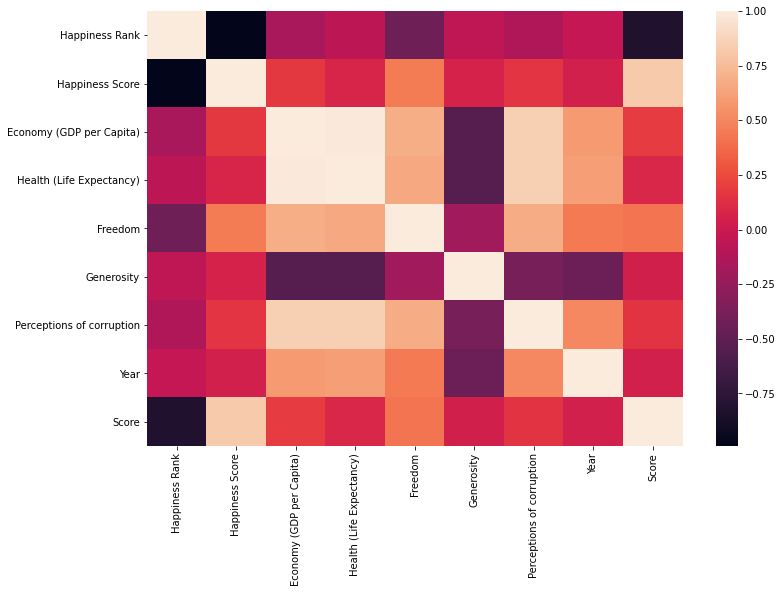

In [33]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr())

# Combining with pillar data

In [34]:
pillars = pd.read_csv('data/processed/Legatum_Pillars.csv', encoding = "ISO-8859-1")
pillars.head()

,area_name,area_code,area_group,pillar_name,rank_2007,rank_2008,rank_2009,rank_2010,rank_2011,rank_2012,...,score_2011,score_2012,score_2013,score_2014,score_2015,score_2016,score_2017,score_2018,score_2019,score_2020
0,Afghanistan,AFG,Asia-Pacific,Safety and Security,163,164,165,164,166,167,...,28.2,28.0,29.2,32.5,22.5,26.1,23.7,21.7,18.5,19.3
1,Afghanistan,AFG,Asia-Pacific,Personal Freedom,127,127,121,125,129,136,...,36.7,34.8,36.8,37.9,35.5,34.7,35.6,35.1,34.4,33.8
2,Afghanistan,AFG,Asia-Pacific,Governance,145,145,145,149,149,150,...,28.3,28.4,29.2,29.5,29.5,30.1,30.4,31.4,31.2,32.4
3,Afghanistan,AFG,Asia-Pacific,Social Capital,161,161,161,154,157,163,...,37.4,34.7,41.1,37.3,32.2,34.8,38.8,22.5,26.7,24.0
4,Afghanistan,AFG,Asia-Pacific,Investment Environment,166,163,163,163,162,161,...,28.9,28.9,28.9,28.9,28.3,27.8,28.0,28.0,30.6,34.9


In [35]:
def clean_year(row):
    return row.split('_')[1]

pillars = pd.melt(pillars, id_vars=['area_name', 'area_code', 'area_group', 'pillar_name'], value_vars=[ 'score_2007', 'score_2008', 'score_2009',
       'score_2010', 'score_2011', 'score_2012', 'score_2013', 'score_2014',
       'score_2015', 'score_2016', 'score_2017', 'score_2018', 'score_2019',
       'score_2020'])
    
pillars['variable'] = pillars['variable'].apply(clean_year)
pillars.columns = ['Country', 'Country Code', 'Area Group', 'Pillar Name', 'Year', 'Score']
pillars['Year'] = pd.to_numeric(pillars['Year'], errors='coerce')

pillars = pillars.pivot_table('Score', ['Country', 'Country Code', 'Area Group', 'Year'], 'Pillar Name').reset_index(drop=False)
pillars.head()


Pillar Name,Country,Country Code,Area Group,Year,Economic Quality,Education,Enterprise Conditions,Governance,Health,Investment Environment,Living Conditions,Market Access and Infrastructure,Natural Environment,Personal Freedom,Safety and Security,Social Capital
0,Afghanistan,AFG,Asia-Pacific,2007,25.6,25.4,45.2,29.9,41.5,25.9,26.7,27.1,43.0,39.3,39.7,35.0
1,Afghanistan,AFG,Asia-Pacific,2008,32.2,25.6,43.4,29.9,42.1,28.2,27.8,24.0,43.5,38.7,38.0,35.0
2,Afghanistan,AFG,Asia-Pacific,2009,32.1,25.6,43.7,29.9,42.7,28.2,29.2,24.0,43.5,40.4,35.6,35.0
3,Afghanistan,AFG,Asia-Pacific,2010,33.0,25.7,44.0,28.1,43.7,28.6,33.2,22.5,44.3,39.5,29.2,38.5
4,Afghanistan,AFG,Asia-Pacific,2011,34.2,25.7,44.0,28.3,45.5,28.9,33.6,22.7,43.1,36.7,28.2,37.4


In [36]:
prosp_scores = pd.read_excel('data/Legatum_Prosperity_Index_Full_2020_Data_Set.xlsx', engine='openpyxl')
prosp_scores.head()

,area_name,area_code,area_group,rank_2007,rank_2008,rank_2009,rank_2010,rank_2011,rank_2012,rank_2013,...,score_2011,score_2012,score_2013,score_2014,score_2015,score_2016,score_2017,score_2018,score_2019,score_2020
0,Afghanistan,AFG,Asia-Pacific,163,163,162,161,162,161,160,...,34.018804,33.529762,34.848416,35.455467,33.878693,34.122529,34.704901,33.234143,33.607822,34.350055
1,Albania,ALB,Eastern Europe,74,75,76,67,66,65,66,...,57.100940,57.345438,57.155699,57.095382,57.409473,57.699371,57.855046,59.182053,60.132551,59.573636
2,Algeria,DZA,Middle East and North Africa,107,109,107,107,103,110,111,...,50.207155,48.905687,48.401319,49.657271,49.944818,50.026566,49.876850,50.919671,51.913637,51.869120
3,Angola,AGO,Sub-Saharan Africa,159,158,157,155,155,156,157,...,38.016257,38.572966,37.812000,38.525195,37.700592,37.486662,37.557328,38.027078,38.516626,38.816856
4,Argentina,ARG,Latin America and the Caribbean,58,61,61,59,59,59,61,...,58.432921,58.692951,58.460087,58.318294,57.707772,58.148349,58.740263,60.238654,60.760305,60.487355


In [37]:
prosp_scores = pd.melt(prosp_scores, id_vars=['area_name', 'area_code', 'area_group'], value_vars=[ 'score_2007', 'score_2008', 'score_2009',
       'score_2010', 'score_2011', 'score_2012', 'score_2013', 'score_2014',
       'score_2015', 'score_2016', 'score_2017', 'score_2018', 'score_2019',
       'score_2020'])

prosp_scores['variable'] = prosp_scores['variable'].apply(clean_year)
prosp_scores.columns = ['Country', 'Country Code', 'Area Group', 'Year', 'Score']
prosp_scores['Year'] = pd.to_numeric(prosp_scores['Year'], errors='coerce')


In [38]:
data = pd.merge(prosp_scores, pillars, on=['Country', 'Country Code', 'Year', 'Area Group'])
data.head()

,Country,Country Code,Area Group,Year,Score,Economic Quality,Education,Enterprise Conditions,Governance,Health,Investment Environment,Living Conditions,Market Access and Infrastructure,Natural Environment,Personal Freedom,Safety and Security,Social Capital
0,Afghanistan,AFG,Asia-Pacific,2007,33.691287,25.6,25.4,45.2,29.9,41.5,25.9,26.7,27.1,43.0,39.3,39.7,35.0
1,Albania,ALB,Eastern Europe,2007,54.876495,45.9,61.4,43.3,48.8,73.4,48.7,70.1,42.9,55.6,54.3,73.2,40.9
2,Algeria,DZA,Middle East and North Africa,2007,48.828327,45.8,52.8,35.9,39.3,70.9,38.2,71.8,36.7,50.9,37.6,58.7,47.4
3,Angola,AGO,Sub-Saharan Africa,2007,35.713846,41.6,25.6,26.2,29.5,41.9,25.9,33.8,25.1,50.9,30.1,55.7,42.0
4,Argentina,ARG,Latin America and the Caribbean,2007,58.068304,46.1,66.6,41.5,47.9,75.0,49.0,81.3,42.5,59.8,67.6,71.8,47.6


In [26]:
data.to_csv('Legatum_Scores_and_Pillars.csv')

# Viz

In [49]:
import plotly.offline as py
import plotly.graph_objs as go
import geopandas as gpd
import pycountry

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

data.columns = ['Country', 'iso_a3', 'Area Group', 'Year', 'Prosperity Score',
       'Economic Quality', 'Education', 'Enterprise Conditions', 'Governance',
       'Health', 'Investment Environment', 'Living Conditions',
       'Market Access and Infrastructure', 'Natural Environment',
       'Personal Freedom', 'Safety and Security', 'Social Capital']

geo_data = pd.merge(world, data, on='iso_a3')
geo_data.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,Area Group,Year,Prosperity Score,...,Enterprise Conditions,Governance,Health,Investment Environment,Living Conditions,Market Access and Infrastructure,Natural Environment,Personal Freedom,Safety and Security,Social Capital
0,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,Sub-Saharan Africa,2007,45.223962,...,41.9,47.2,47.6,44.4,39.7,30.7,55.3,47.5,62.2,44.6
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,Sub-Saharan Africa,2008,45.942928,...,45.4,47.2,48.5,44.1,39.9,30.7,54.2,47.5,66.4,44.5
2,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,Sub-Saharan Africa,2009,45.965727,...,44.3,47.2,48.7,44.0,39.4,31.0,53.8,46.8,63.7,49.1
3,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,Sub-Saharan Africa,2010,45.997233,...,46.1,44.8,50.6,43.5,37.5,31.2,52.6,48.2,62.4,52.4
4,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,Sub-Saharan Africa,2011,46.393392,...,47.2,45.2,52.1,43.5,38.3,30.9,53.6,48.9,67.1,49.1


In [51]:
import plotly.express as px


fig = px.choropleth(geo_data, locations="iso_a3",
                    color="Prosperity Score", 
                    hover_name="Country",
                    animation_frame="Year",
                    title="Legatum Prosperity Index",
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.update_geos(fitbounds="locations", visible=False)
fig.show()

In [52]:
import chart_studio
import chart_studio.plotly as py

username = 'justuser'
api_key = 'OSgbKlPoTwcNl5dxhMQU'

chart_studio.tools.set_credentials_file(username=username, api_key=api_key)
py.plot(fig, filename = 'prosperity_map', auto_open=True)


'https://plotly.com/~justuser/8/'

# With WHR

In [15]:
whr_data = pd.read_csv('data/whr_data.csv')
whr_data.drop('Unnamed: 0', axis=1, inplace=True)
whr_data = whr_data[whr_data['Country Code'] != 'Unknown']
#whr_data.head()

In [16]:
data = pd.merge(whr_data, data, on=['Country Code', 'Year'])
data.head()

,Country_x,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Generosity,Perceptions of corruption,Year,Country Code,...,Enterprise Conditions,Governance,Health,Investment Environment,Living Conditions,Market Access and Infrastructure,Natural Environment,Personal Freedom,Safety and Security,Social Capital
0,Switzerland,1,7.587,1.39651,0.94143,0.66557,0.29678,0.41978,2014,CHE,...,84.2,87.8,83.4,74.0,95.4,76.7,71.5,85.2,91.0,73.2
1,Iceland,2,7.561,1.30232,0.94784,0.62877,0.43630,0.14145,2014,ISL,...,73.1,82.8,83.4,67.8,93.7,73.8,70.7,86.4,92.9,71.6
2,Denmark,3,7.527,1.32548,0.87464,0.64938,0.34139,0.48357,2014,DNK,...,79.7,87.9,82.0,74.9,96.6,79.1,69.4,90.5,93.7,79.1
3,Norway,4,7.522,1.45900,0.88521,0.66973,0.34699,0.36503,2014,NOR,...,82.0,88.8,82.2,79.1,94.2,75.0,69.4,90.5,86.5,78.5
4,Canada,5,7.427,1.32629,0.90563,0.63297,0.45811,0.32957,2014,CAN,...,79.2,82.4,79.1,77.2,93.9,73.9,69.0,86.5,88.7,72.2


<AxesSubplot:>

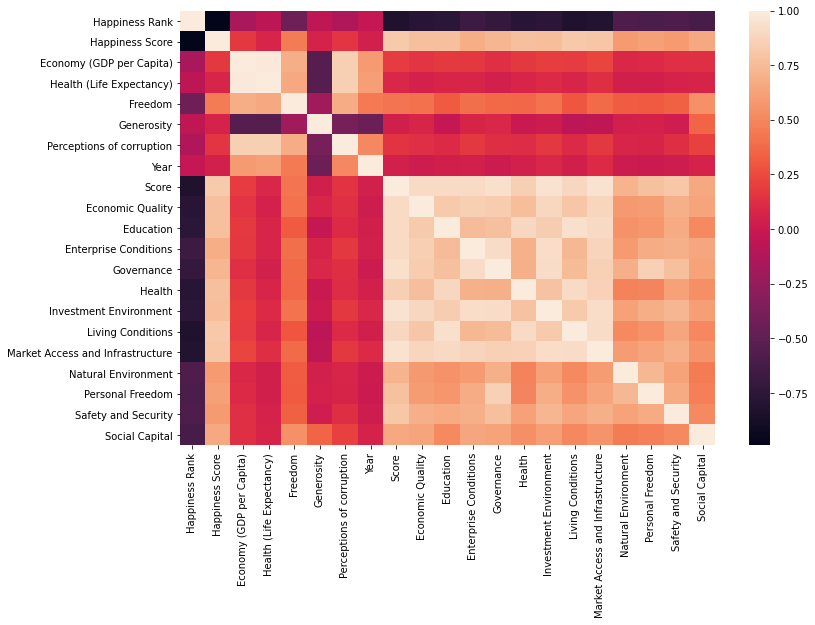

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr())

In [24]:
import plotly.express as px

fig = px.scatter(data.groupby(['Country_x']).mean().reset_index(), x="Score", y="Happiness Score",
                 size="Economy (GDP per Capita)", color="Economy (GDP per Capita)",
                 hover_name="Country_x", log_x=True, size_max=60)
fig.show()
